In [1]:
import pandas as pd
import numpy as np
from simpful import *
import matplotlib.pyplot as plt
FS = FuzzySystem()
FS1 = FuzzySystem()
df = pd.read_csv('ACI23-24_Proj1_SampleData.csv', sep = ',', decimal = '.')

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



APENAS GRÁFICOS E OBSERVAÇÃO DOS DADOS

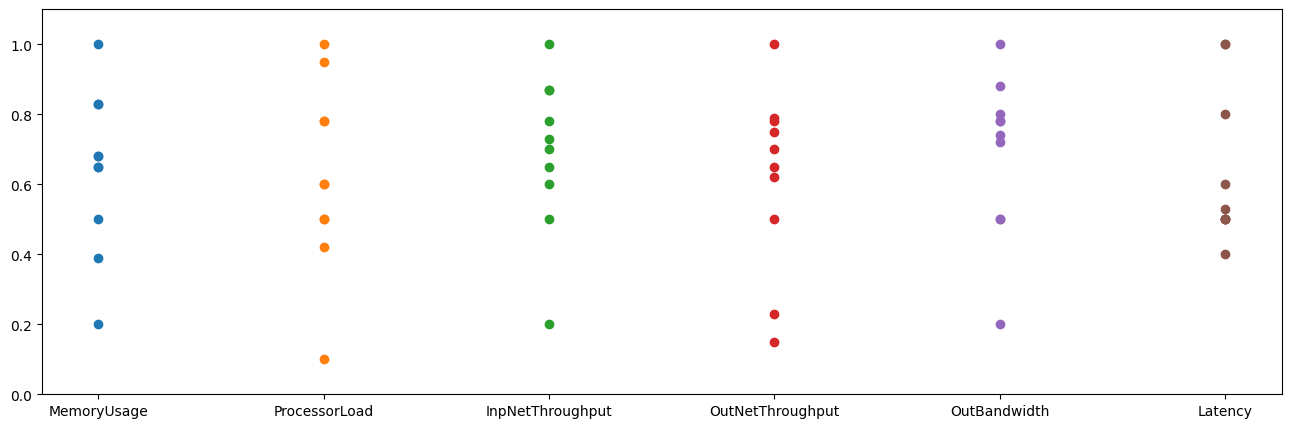

In [2]:
Nomes = df.columns
plt.figure(figsize=(16, 5))
for i, name in enumerate(Nomes[:6]):
    plt.scatter(np.full(df[name].size,i), df[name])
plt.ylim(0, 1.1)
plt.xticks(np.arange(6), Nomes[:6])
plt.show()

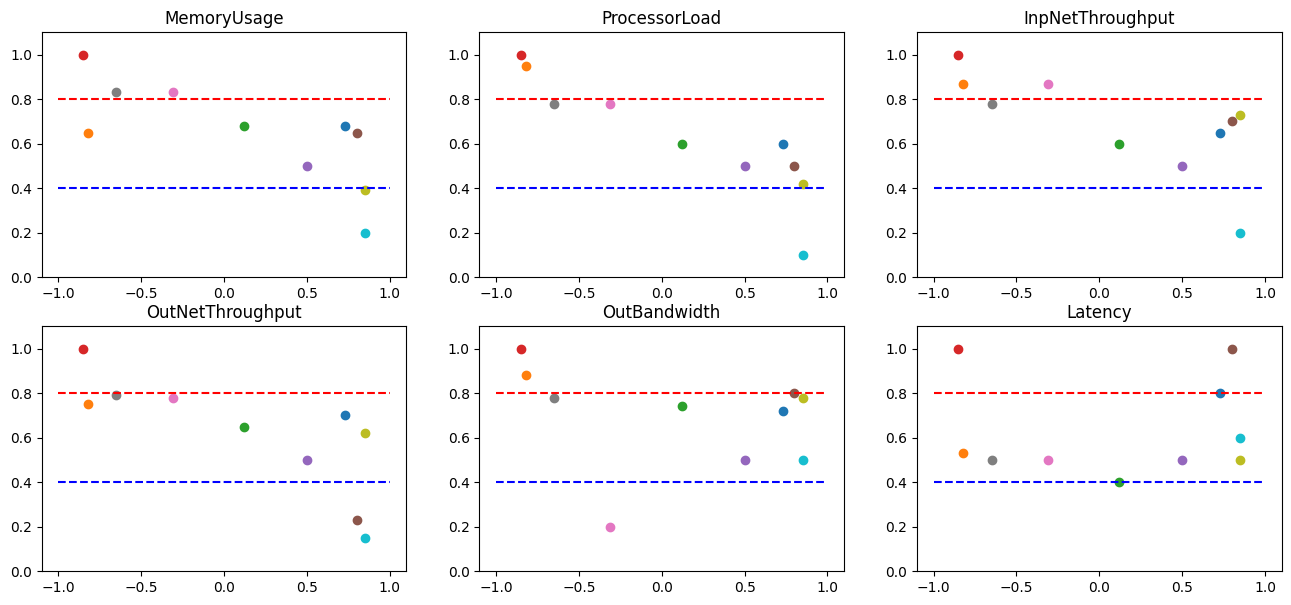

In [3]:
plt.figure(figsize=(16, 7))
for i in range(0,6):
    plt.subplot(2, 3, i+1)
    for j in range(0,df[Nomes[i]].size):
        plt.scatter(df["CLPVariation"][j], df[Nomes[i]][j])
    plt.title(Nomes[i])
    plt.plot([-1, 1], [0.4, 0.4], 'b--', [-1, 1], [0.8, 0.80], 'r--')
    plt.ylim(0, 1.1)
plt.show()

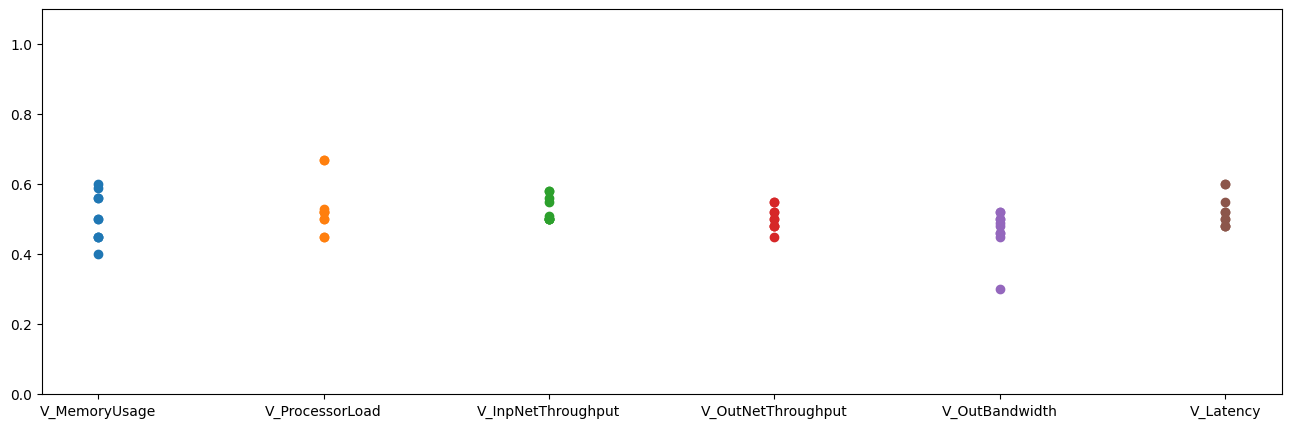

In [4]:
plt.figure(figsize=(16, 5))
for i, name in enumerate(Nomes[6:-1]):
    plt.scatter(np.full(df[name].size,i), df[name])
plt.ylim(0, 1.1)
plt.xticks(np.arange(6), Nomes[6:-1])
plt.show()

A escala do y está ampliada de forma a notar-se diferença

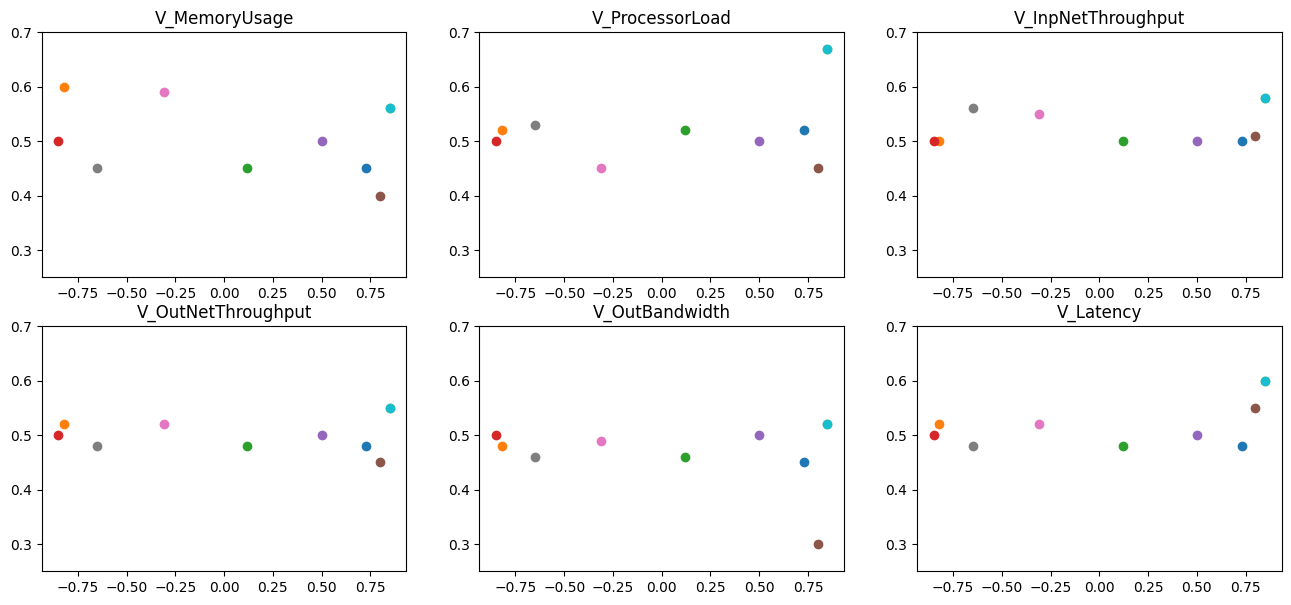

In [5]:
plt.figure(figsize=(16, 7))
for i in range(6,Nomes.size-1):
    plt.subplot(2, 3, i-5)
    for j in range(0,df[Nomes[i]].size):
        plt.scatter(df["CLPVariation"][j], df[Nomes[i]][j])
    plt.title(Nomes[i])
    plt.ylim(0.25,0.7) #MUDAR SE QUISER VER O TAMANHO REAL
    #plt.plot([-1, 1], [0.25, 0.25], 'b--', [-1, 1], [0.7, 0.7], 'r--')
plt.show()

In [ ]:
df.std()

In [ ]:
df.mean()

In [ ]:
df.corr()

SISTEMA FUZZY

In [ ]:
Lat_1 = TrapezoidFuzzySet(0.4, 0.7, 1,1, term= 'High')
Lat_2 = TrapezoidFuzzySet(0, 0, 0.3, 0.6, term= 'Low')
FS1.add_linguistic_variable("Latency", LinguisticVariable([Lat_1, Lat_2], universe_of_discourse=[0, 1]))
Memory1 = TrapezoidFuzzySet(0, 0, 0.6, 0.7, term="Good")
Memory2 = TrapezoidFuzzySet(0.6, 0.7, 1, 1, term="Full")
FS1.add_linguistic_variable("MemoryUsage", LinguisticVariable([Memory1, Memory2], universe_of_discourse=[0, 1]))
OutB_1 = TrapezoidFuzzySet(0.5, 0.8, 1,1, term= 'High')
OutB_2 = TrapezoidFuzzySet(0, 0, 0.4, 0.7, term= 'Low')
FS1.add_linguistic_variable("OutBandwidth", LinguisticVariable([OutB_1, OutB_2], universe_of_discourse=[0, 1]))
Fuzzy1 = AutoTriangle(3, terms=["Low", "Medim", "High" ], universe_of_discourse=[0,1])
FS1.add_linguistic_variable("Fuzzy1", Fuzzy1)
FS1.add_rules(["IF (MemoryUsage IS Good) AND (OutBandwidth IS Low) THEN (Fuzzy1 IS Low)",
"IF (Latency IS High) AND (MemoryUsage IS Good) AND (OutBandwidth IS High) THEN (Fuzzy1 IS Low)",
"IF (Latency IS Low) AND (MemoryUsage IS Good) AND (OutBandwidth IS High) THEN (Fuzzy1 IS Medium)",
"IF (MemoryUsage IS Full) AND (OutBandwidth IS Low) THEN (Fuzzy1 IS Medium)",
"IF (MemoryUsage IS Full) AND (OutBandwidth IS High) THEN (Fuzzy1 IS High)"])


In [ ]:
CPU1 = TriangleFuzzySet(0, 0, 0.55, term="Low")
CPU2 = TriangleFuzzySet(0.35, 0.5, 0.7, term="Medium")
CPU3 = TrapezoidFuzzySet(0.6, 0.85, 1,1, term="High")
FS.add_linguistic_variable("ProcessorLoad", LinguisticVariable([CPU1, CPU2, CPU3], universe_of_discourse=[0, 1]))
FS.add_linguistic_variable("Fuzzy1", Fuzzy1)
FS1.set_variable("Latency", 0.1)
FS1.set_variable("OutBandwidth", 0.5)
FS1.set_variable("MemoryUsage", 0.5)
FS.set_variable(Fuzzy1, FS1.inference()['Fuzzy1'])
CLP = AutoTriangle(5, terms=["Decreased", "Marginal Decrease", "Maintain", "Marginal Increase", "Increase" ], universe_of_discourse=[-1,1])
FS.add_linguistic_variable("CLPVariation", CLP)
FS.produce_figure()


FS.add_rules(["IF ProcessorLoad IS Low THEN CLPVariation IS Increase", 
              "IF ProcessorLoad IS Medium THEN CLPVariation IS Maintain", 
              "IF ProcessorLoad IS High THEN CLPVariation IS Decreased"])



Plot


In [ ]:
xs = []
ys = []
DIVs = 21
for x in np.linspace(0, 1, DIVs):
        FS.set_variable("ProcessorLoad", x)
        CLP = FS.inference()['CLPVariation']
        xs.append(x)
        ys.append(CLP)
xs = np.array(xs)
ys = np.array(ys)
plt.figure(figsize=(15, 7))
#xx, yy = np.meshgrid(xs, ys)
plt.plot(xs, ys)
plt.yticks([-0.85, -.5, 0, 0.5, 0.85])
plt.xlabel("Processor Load")
plt.ylabel("CLP Variation")
plt.title("Simpful", pad=20)
plt.show()



In [ ]:
xs = []
ys = []
for i in df['ProcessorLoad']:
    print(i, end=", ")
    FS.set_variable("ProcessorLoad", i)
    CLP = FS.inference()['CLPVariation']
    xs.append(i)
    ys.append(CLP)
SSE = np.linalg.norm(ys-df['CLPVariation'])**2
print("\nSSE:", SSE)  #Valor do SSE
print("\n", df.iloc[:, -1].ravel()) #Valores reais
[print(f"{i:.4f}", end=", ") for i in ys] #Valores preditos